<a href="https://colab.research.google.com/github/Soumika-Seelam/4375hw1/blob/main/Decision_Tree_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classification Model

We will use the built in Pima Indians Diabetes dataset. It is available as part of the SKlearn datasets. We have made it easily available for you.

In [1]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/pima-indians-diabetes.csv", header=None, names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [5]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)

In [6]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.72      0.75      0.74       146
           1       0.54      0.51      0.52        85

    accuracy                           0.66       231
   macro avg       0.63      0.63      0.63       231
weighted avg       0.66      0.66      0.66       231

Predicted labels:  [0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Accuracy:  0.6623376623376623


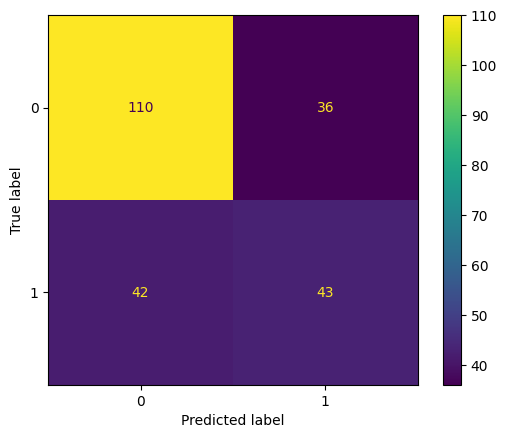

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


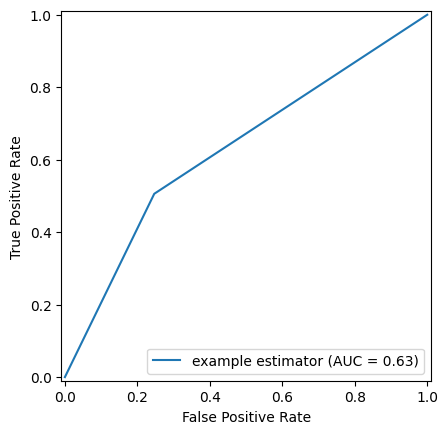

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [9]:
!pip install graphviz

In [10]:
X.columns

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')

In [11]:
classes = y.unique()

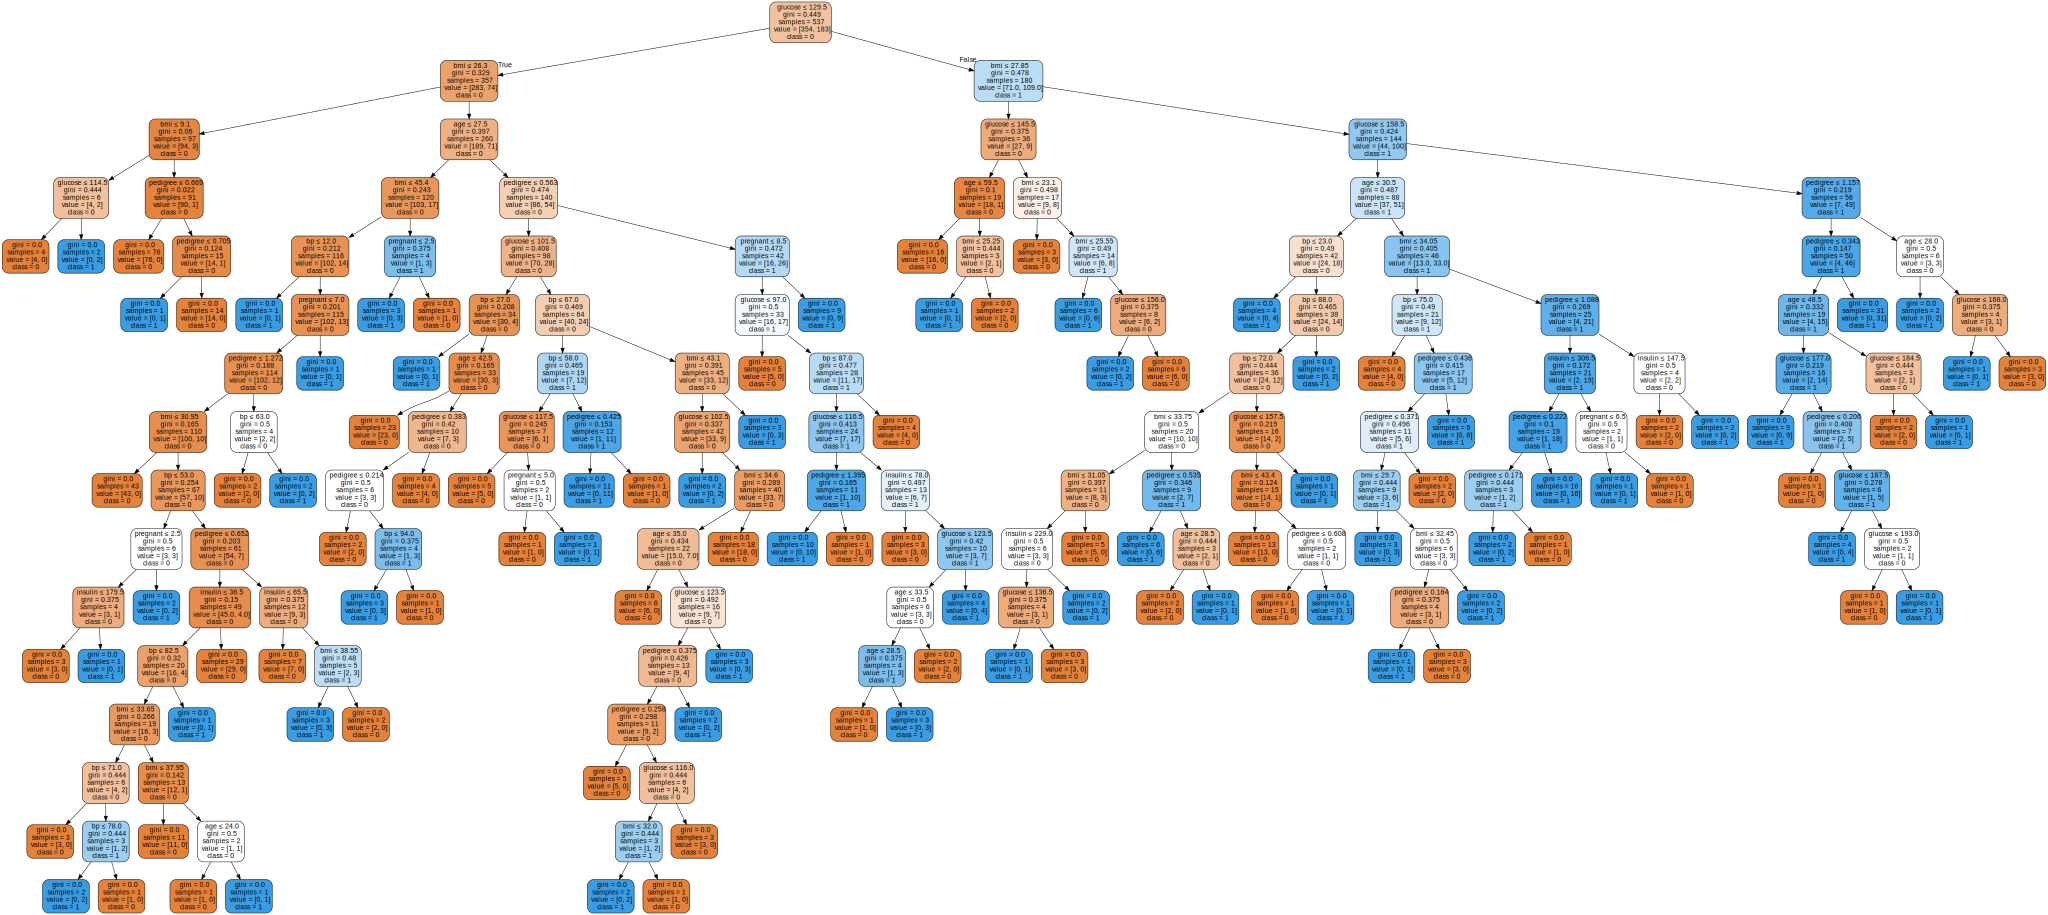

In [12]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names = feature_cols,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Excercise 1

Construct the following models on the same dataset:
- Bagging
- Random Forest
- Adaboost

Compare their performance and write a short paragraph on which one is the best. You are free to change the hyperparameters.


In [13]:
# Importing BaggingClassifier and accuracy_score to evaluate
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# then we initialize a Bagging Classifier that has 50 trees (plus fixed random seed for better reproducibility)
bagging_model = BaggingClassifier(n_estimators=50, random_state=1)

bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.2f}")


Bagging Classifier Accuracy: 0.78


In [14]:
# importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# here we initialize the Random Forest model with 100 trees as well as a max depth of 5
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

random_forest_model.fit(X_train, y_train)
rf_predictions = random_forest_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")


Random Forest Accuracy: 0.80


In [15]:
# here we are importing the AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# we next intialize the AdaBoost model with 50 different estimators
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=1)

adaboost_model.fit(X_train, y_train)
ada_predictions = adaboost_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predictions)
print(f"AdaBoost Accuracy: {ada_accuracy:.2f}")


AdaBoost Accuracy: 0.78


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [16]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test, predictions):.2f}")
print(f"Bagging Accuracy: {bagging_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"AdaBoost Accuracy: {ada_accuracy:.2f}")

Decision Tree Accuracy: 0.66
Bagging Accuracy: 0.78
Random Forest Accuracy: 0.80
AdaBoost Accuracy: 0.78


#### **Comparison**

By comparing the accuracy we can see that Random Forest had the highest accuracy, while AdaBoost was pretty close behind! Random Forest having the highest accuracy can be contributed to the fact that it uses multiple decision trees, which have randomness, which helps reduce overfitting and variance.

### Application on Cuisines Dataset

In [17]:
import pandas as pd
cuisines_df = pd.read_csv("https://raw.githubusercontent.com/a-nagar/datasets/refs/heads/main/asian_cuisines.csv")
cuisines_df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

,cuisine
0,indian
1,indian
2,indian
3,indian
4,indian


In [19]:
cuisines_label_df.value_counts()

,count
cuisine,
indian,799
thai,799
chinese,799
japanese,799
korean,799


In [20]:
cuisine_labels_distinct = cuisines_label_df.unique()

In [21]:
cuisine_labels_distinct

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [22]:
cuisines_feature_df = cuisines_df.drop(['cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

In [24]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)

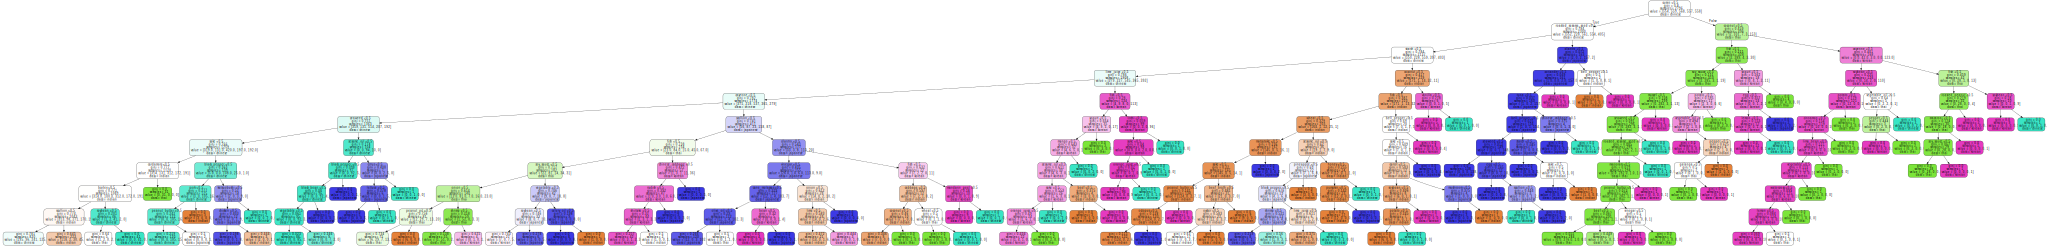

In [25]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=cuisines_feature_df.columns,
                     class_names=cuisine_labels_distinct,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.81      0.40      0.54       230
      indian       0.85      0.80      0.82       248
    japanese       0.42      0.88      0.57       241
      korean       0.82      0.60      0.69       230
        thai       0.78      0.54      0.64       250

    accuracy                           0.65      1199
   macro avg       0.74      0.65      0.65      1199
weighted avg       0.74      0.65      0.65      1199



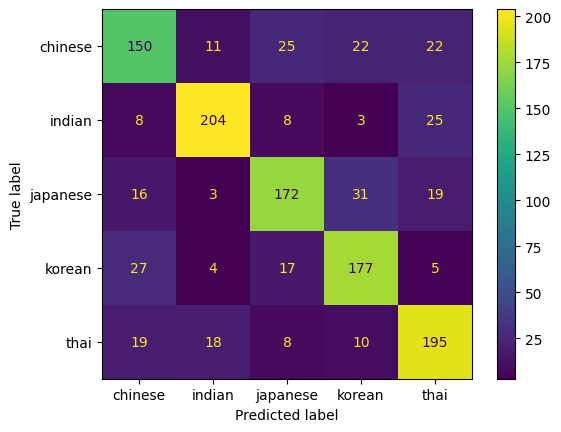

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# Exercise 2

The accuracy for this dataset is quite low. Can you try any other method that increases the accuracy. You can try either Random Forest or Adaboost. What do you notice?

In [26]:
# here we are importing the needed libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# we then go on to define a pipeline as well as a parameter grid for the Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [2, 3, 5]
}

# we then do grid search with cross-validation to tune hyperparameters and help model generalize
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validated accuracy for Decision Tree:", grid_search_dt.best_score_)


Best parameters for Decision Tree: {'max_depth': 9, 'min_samples_leaf': 2}
Best cross-validated accuracy for Decision Tree: 0.6026443904932277


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [27]:
# here we are importing the needed libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# we then define a parameter grid for the Random Forest
param_grid_rf = {
    # number of trees
    'n_estimators': [50, 100, 200],
    # max depth of each tree
    'max_depth': [5, 7, 9],
    # which count of features for the split to be the best
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validated accuracy for Random Forest:", grid_search_rf.best_score_)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest: {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 200}
Best cross-validated accuracy for Random Forest: 0.7696728852542806


In [28]:
# next we have to train the Decision Tree with the best possible parameters
best_dt = DecisionTreeClassifier(max_depth=grid_search_dt.best_params_['max_depth'],
                                 min_samples_leaf=grid_search_dt.best_params_['min_samples_leaf'],
                                 random_state=1)
best_dt.fit(X_train, y_train)

dt_tuned_predictions = best_dt.predict(X_test)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, dt_tuned_predictions))


Tuned Decision Tree Accuracy: 0.6321934945788157


In [29]:
# next we have to train the Random Forest with the best possible parameters
best_rf = RandomForestClassifier(n_estimators=grid_search_rf.best_params_['n_estimators'],
                                 max_depth=grid_search_rf.best_params_['max_depth'],
                                 max_features=grid_search_rf.best_params_['max_features'],
                                 random_state=1)
best_rf.fit(X_train, y_train)
rf_tuned_predictions = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_tuned_predictions))


Tuned Random Forest Accuracy: 0.7731442869057548


#### **Summary**

After tuning the hyperparameters of Decision Tree and Random Forest, we can see that the accuracy of both models went up. Random Forest did better than Decision Tree, which is due to how the Random Forest ensemble method reduces overfitting and increases generalization.

# Parameter Grid Builder for Parameter Tuning

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

dt_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('dt', DecisionTreeClassifier())])
params = [{'dt__max_depth': [3, 5, 7, 9],
         'dt__min_samples_leaf': [2, 3, 5]}]

gs_dt = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_dt.fit(cuisines_feature_df, cuisines_label_df)
print(gs_dt.best_params_)
# find best model score
print(gs_dt.score(cuisines_feature_df, cuisines_label_df))


{'dt__max_depth': 9, 'dt__min_samples_leaf': 3}
0.6475594493116396


In [31]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rf = RandomForestClassifier()

params = {'max_depth': [5, 7, 9],
          'n_estimators': [50, 100, 200],
          'max_features': ['sqrt', 'log2']
          }

grid = GridSearchCV(rf, params, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(cuisines_feature_df, cuisines_label_df)

print(grid.best_params_)
# find best model score
print(grid.score(cuisines_feature_df, cuisines_label_df))

{'max_depth': 9, 'max_features': 'log2', 'n_estimators': 200}
0.8010012515644556


# Exercise 3

Try other combination of hyperparameters for Random Forest and AdaBoost models and check how good of an accuracy you can obtain.

In [35]:
# the full expanded parameter grid for the Random Forest
param_grid_rf_expanded = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# we then do the grid search
grid_search_rf_expanded = GridSearchCV(RandomForestClassifier(random_state=1), param_grid_rf_expanded, cv=, scoring='accuracy')
grid_search_rf_expanded.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf_expanded.best_params_)
print("Best cross-validated accuracy for Random Forest:", grid_search_rf_expanded.best_score_)


Best parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best cross-validated accuracy for Random Forest: 0.8304721030042918


In [37]:
# import the needed libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# expand the parameter grid for AdaBoost
param_grid_ada_expanded = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'estimator__max_depth': [1, 2, 3, 5]  # Updated to match 'estimator'
}

grid_search_ada_expanded = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=1),
                                        param_grid_ada_expanded, cv=5, scoring='accuracy')
grid_search_ada_expanded.fit(X_train, y_train)

print("Best parameters for AdaBoost:", grid_search_ada_expanded.best_params_)
print("Best cross-validated accuracy for AdaBoost:", grid_search_ada_expanded.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

KeyboardInterrupt: 

In [ ]:
best_rf_expanded = RandomForestClassifier(**grid_search_rf_expanded.best_params_, random_state=1)
best_rf_expanded.fit(X_train, y_train)
rf_expanded_predictions = best_rf_expanded.predict(X_test)
print("Random Forest Accuracy (Tuned):", accuracy_score(y_test, rf_expanded_predictions))


In [ ]:
best_ada_expanded = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=grid_search_ada_expanded.best_params_['base_estimator__max_depth']),
                                       n_estimators=grid_search_ada_expanded.best_params_['n_estimators'],
                                       learning_rate=grid_search_ada_expanded.best_params_['learning_rate'],
                                       random_state=1)
best_ada_expanded.fit(X_train, y_train)
ada_expanded_predictions = best_ada_expanded.predict(X_test)
print("AdaBoost Accuracy (Tuned):", accuracy_score(y_test, ada_expanded_predictions))


In [ ]:
print("Final Accuracy Comparison:")
print(f"Random Forest (expanded): {accuracy_score(y_test, rf_expanded_predictions):.2f}")
print(f"AdaBoost (expanded): {accuracy_score(y_test, ada_expanded_predictions):.2f}")


#### **Findings**

The best hyperparameters for Random Forest are n_estimators=200, max_depth=15, and max_features='sqrt' which all help balance the complexity and performance of the model. For Adaboost, the best was n_estimators=200, learning_rate=0.1, and max_depth=3 for the bast estimator (which corrects errors iteratively). All of these different combinations help to prevent overfitting but still making sure to pick up on complex patterns.